author : sybyeon1102@gmali.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/국민건강보험공단_건강검진정보_20211229.CSV', encoding='euc-kr')

In [3]:
data.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [5]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [6]:
# 그룹핑에 사용할 컬럼들 임의로 뽑아봄
col_groups = ['성별코드', '연령대 코드(5세단위)', '허리둘레', '수축기 혈압', '이완기 혈압', '총 콜레스테롤']

In [7]:
data.groupby(by=col_groups).count()['흡연상태']

성별코드  연령대 코드(5세단위)  허리둘레   수축기 혈압  이완기 혈압  총 콜레스테롤
1     9             56.0   108.0   72.0    236.0      1
                    57.0   119.0   77.0    198.0      1
                           122.0   76.0    206.0      1
                           135.0   82.0    134.0      1
                    58.0   109.0   66.0    186.0      1
                                                     ..
2     18            110.0  158.0   87.0    198.0      1
                           160.0   80.0    229.0      1
                    110.4  123.0   83.0    230.0      1
                    113.8  153.0   66.0    231.0      1
                    120.0  123.0   71.0    138.0      1
Name: 흡연상태, Length: 398927, dtype: int64

- count하면 1개 씩밖에 안나옴 -> 각 컬럼을 카테고리화 해야함

# 특정 값으로 나눈 몫으로 그룹화 시도

In [8]:
cat_cols = ['허리둘레', '수축기 혈압', '이완기 혈압', '총 콜레스테롤']
cat_cols

['허리둘레', '수축기 혈압', '이완기 혈압', '총 콜레스테롤']

## 5, 20

In [9]:
data1 = data.copy()
for c in cat_cols:
    if c == '총 콜레스테롤':
        interval = 20
    else:
        interval = 5
    data1[c] = data1[c]//interval

In [10]:
data1.groupby(by=cat_cols).mean()['흡연상태']

허리둘레   수축기 혈압  이완기 혈압  총 콜레스테롤
1.0    26.0    16.0    16.0       1.0
7.0    21.0    13.0    10.0       1.0
       22.0    16.0    6.0        1.0
9.0    21.0    14.0    6.0        1.0
10.0   16.0    12.0    8.0        1.0
                                 ... 
28.0   23.0    14.0    10.0       1.0
       28.0    16.0    10.0       1.0
29.0   30.0    18.0    10.0       3.0
136.0  19.0    12.0    8.0        1.0
199.0  23.0    14.0    13.0       1.0
Name: 흡연상태, Length: 17937, dtype: float64

In [11]:
data1.groupby(by=cat_cols).count()['흡연상태']

허리둘레   수축기 혈압  이완기 혈압  총 콜레스테롤
1.0    26.0    16.0    16.0       1
7.0    21.0    13.0    10.0       1
       22.0    16.0    6.0        1
9.0    21.0    14.0    6.0        1
10.0   16.0    12.0    8.0        1
                                 ..
28.0   23.0    14.0    10.0       1
       28.0    16.0    10.0       1
29.0   30.0    18.0    10.0       1
136.0  19.0    12.0    8.0        1
199.0  23.0    14.0    13.0       1
Name: 흡연상태, Length: 17937, dtype: int64

- 그룹이 너무 specific해서 각 그룹에 해당하는 경우가 1개씩 나옴 당황스럽

## 간격 설정 iqr/n로 도전

In [12]:
data.describe()['총 콜레스테롤']

count    402306.000000
mean        198.457729
std          43.210579
min          54.000000
25%         170.000000
50%         197.000000
75%         225.000000
max        2416.000000
Name: 총 콜레스테롤, dtype: float64

In [13]:
q1 = data.describe().loc['25%', '총 콜레스테롤']
q3 = data.describe().loc['75%', '총 콜레스테롤']
q1, q3

(170.0, 225.0)

In [14]:
data2 = data.copy()
for c in cat_cols:
    q1 = data.describe().loc['25%', c]
    q3 = data.describe().loc['75%', c]
    interval = (q3-q1)//2
    print(c, interval)
    data2[c] = data2[c]//interval

허리둘레 6.0
수축기 혈압 9.0
이완기 혈압 6.0
총 콜레스테롤 27.0


In [15]:
data2.groupby(by=cat_cols).count()['흡연상태']

허리둘레   수축기 혈압  이완기 혈압  총 콜레스테롤
1.0    14.0    14.0    12.0       1
6.0    11.0    11.0    7.0        1
       12.0    13.0    4.0        1
8.0    8.0     10.0    6.0        1
       9.0     8.0     7.0        1
                                 ..
23.0   12.0    12.0    7.0        1
       15.0    13.0    7.0        1
24.0   16.0    15.0    7.0        1
113.0  11.0    10.0    6.0        1
166.0  13.0    12.0    10.0       1
Name: 흡연상태, Length: 7843, dtype: int64

## 간격 (max-min)/n 로 도전

In [16]:
data.describe()['총 콜레스테롤']

count    402306.000000
mean        198.457729
std          43.210579
min          54.000000
25%         170.000000
50%         197.000000
75%         225.000000
max        2416.000000
Name: 총 콜레스테롤, dtype: float64

In [17]:
min_ = data.describe().loc['min', '총 콜레스테롤']
max_ = data.describe().loc['max', '총 콜레스테롤']
min_, max_

(54.0, 2416.0)

In [18]:
data3 = data.copy()
for c in cat_cols:
    min_ = data.describe().loc['min', c]
    max_ = data.describe().loc['max', c]
    interval = (max_- min_)//10
    print(c, interval)
    data3[c] = data3[c]//interval

허리둘레 99.0
수축기 혈압 19.0
이완기 혈압 16.0
총 콜레스테롤 236.0


In [19]:
data3.groupby(by=cat_cols).count()['흡연상태']

허리둘레  수축기 혈압  이완기 혈압  총 콜레스테롤
0.0   3.0     2.0     0.0        5
                      1.0        1
              3.0     0.0        5
                      1.0        3
      4.0     1.0     0.0        1
                                ..
1.0   11.0    9.0     0.0        1
                      1.0        1
      13.0    9.0     1.0        1
6.0   5.0     4.0     0.0        1
10.0  6.0     4.0     1.0        1
Name: 흡연상태, Length: 200, dtype: int64

# 각각의 컬럼과 흡연상태의 연관성

In [20]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [21]:
data4 = data.copy()
data4.drop(columns=['기준년도', '가입자 일련번호', '시도코드', 
                    '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
                  '식전혈당(공복혈당)', '음주여부', '구강검진 수검여부', 
                    '치아우식증유무', '치석', '데이터 공개일자'], inplace=True)
data4.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태
0,1,9,165,60,72.1,127.0,79.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0
1,2,13,150,65,81.0,110.0,73.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0
2,2,12,155,55,70.0,123.0,80.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0
3,1,13,160,70,90.8,134.0,84.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0
4,2,12,155,50,75.2,144.0,89.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0


In [22]:
data4.isna().sum()/1000000 # nan 비율

성별코드            0.000000
연령대 코드(5세단위)    0.000000
신장(5Cm단위)       0.000000
체중(5Kg 단위)      0.000000
허리둘레            0.000108
수축기 혈압          0.007532
이완기 혈압          0.007534
총 콜레스테롤         0.597694
트리글리세라이드        0.597678
HDL 콜레스테롤       0.597685
LDL 콜레스테롤       0.605529
혈색소             0.007611
요단백             0.012141
혈청크레아티닌         0.007602
(혈청지오티)AST      0.007601
(혈청지오티)ALT      0.007602
감마 지티피          0.007603
흡연상태            0.000343
dtype: float64

In [23]:
data5 = data4.copy()

In [24]:
data5.drop(columns=['총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤'],
          inplace=True)
data5.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태
0,1,9,165,60,72.1,127.0,79.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0
1,2,13,150,65,81.0,110.0,73.0,12.7,1.0,0.5,18.0,15.0,15.0,1.0
2,2,12,155,55,70.0,123.0,80.0,12.8,1.0,0.7,27.0,25.0,7.0,1.0
3,1,13,160,70,90.8,134.0,84.0,16.4,1.0,1.2,65.0,97.0,72.0,1.0
4,2,12,155,50,75.2,144.0,89.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0


In [25]:
data5.dropna(inplace=True)

In [26]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987366 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   성별코드          987366 non-null  int64  
 1   연령대 코드(5세단위)  987366 non-null  int64  
 2   신장(5Cm단위)     987366 non-null  int64  
 3   체중(5Kg 단위)    987366 non-null  int64  
 4   허리둘레          987366 non-null  float64
 5   수축기 혈압        987366 non-null  float64
 6   이완기 혈압        987366 non-null  float64
 7   혈색소           987366 non-null  float64
 8   요단백           987366 non-null  float64
 9   혈청크레아티닌       987366 non-null  float64
 10  (혈청지오티)AST    987366 non-null  float64
 11  (혈청지오티)ALT    987366 non-null  float64
 12  감마 지티피        987366 non-null  float64
 13  흡연상태          987366 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 113.0 MB


## 흡연상태별 그룹화

- 1 : 안함, 2: 끊음, 3: 함

In [27]:
g_smoke = data5.groupby(by=['성별코드', '흡연상태'])

In [114]:
g_smoke.mean().iloc[: , 7:]

요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마 지티피
성별코드 흡연상태                                                       
1    1.0   1.128881  0.979490   27.140273   27.804966  30.276873
     2.0   1.135478  0.976218   27.460965   28.427976  32.382598
     3.0   1.134697  0.946342   25.980393   27.428851  35.812930
2    1.0   1.096881  0.728824   25.100695   21.204871  21.186519
     2.0   1.114806  0.721330   24.463945   21.040610  23.202612
     3.0   1.118333  0.715814   24.374875   21.035684  26.422531

- 일단 유의미해보이는게 감마 지티피 뿐

In [29]:
data5['감마 지티피'].describe()

count    987366.000000
mean         37.791137
std          51.813693
min           1.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2630.000000
Name: 감마 지티피, dtype: float64

## 성별 & 흡연상태별 감마지티피 분포 확인

In [30]:
gmm_1n1 = g_smoke.get_group((1, 1.0))['감마 지티피']

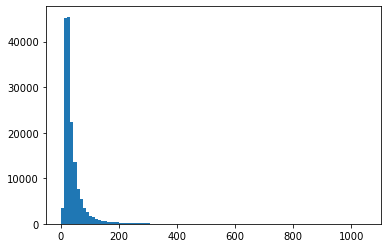

In [31]:
plt.hist(gmm_1n1, bins=100)
plt.show()

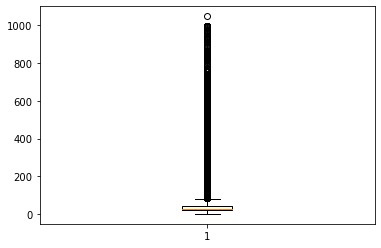

In [32]:
plt.boxplot(gmm_1n1)
plt.show()

### 이상치 제거

In [33]:
data6 = data5.copy()
desc = data6['감마 지티피'].describe()
desc

count    987366.000000
mean         37.791137
std          51.813693
min           1.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2630.000000
Name: 감마 지티피, dtype: float64

In [34]:
q1, q3 = desc['25%'], desc['75%']
iqr = q3 - q1

lw = q1 - iqr*1.5
uw = q3 + iqr*1.5
q1, q3, iqr, lw, uw

(16.0, 40.0, 24.0, -20.0, 76.0)

In [35]:
ol_r_GTP = data6[data6['감마 지티피'] > uw].index

In [36]:
data6.drop(index=ol_r_GTP, inplace=True)

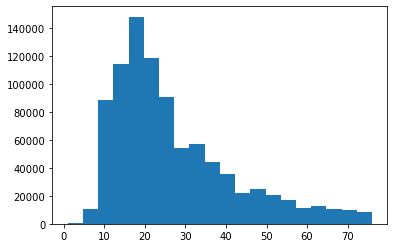

In [37]:
plt.hist(data6['감마 지티피'], bins=20)
plt.show()

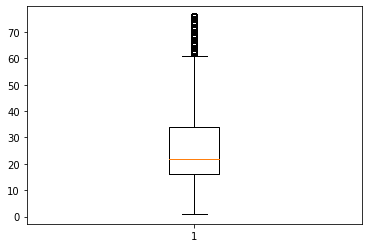

In [38]:
plt.boxplot(data6['감마 지티피'])
plt.show()

### 성별 & 흡연 상태별 그룹화

In [39]:
data6.columns

Index(['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압',
       '이완기 혈압', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피',
       '흡연상태'],
      dtype='object')

In [40]:
g_smoke = data6.groupby(by=['성별코드', '흡연상태'])

In [41]:
g_smoke.get_group((1, 1.0))['감마 지티피']

0         21.0
3         72.0
16        24.0
19        35.0
20        47.0
          ... 
999948    23.0
999956    13.0
999968    25.0
999978    31.0
999997    17.0
Name: 감마 지티피, Length: 143892, dtype: float64

In [42]:
r_GTPs = {}
for sex in data6['성별코드'].unique():
    for smoke in data6['흡연상태'].unique():
        print(sex, smoke)
        sr = g_smoke.get_group((sex, smoke))['감마 지티피']
        sr.reset_index(drop=True, inplace=True)
        r_GTPs[(sex, smoke)] = sr

1 1.0
1 3.0
1 2.0
2 1.0
2 3.0
2 2.0


In [43]:
keys = r_GTPs.keys()
keys = list(keys)
keys

[(1, 1.0), (1, 3.0), (1, 2.0), (2, 1.0), (2, 3.0), (2, 2.0)]

In [44]:
li_sex = dict(zip([1, 2], ['male', 'female']))
li_smoke = dict(zip([1.0, 2.0, 3.0], ['never smoked', 'stopped smoking', 'smoking now']))

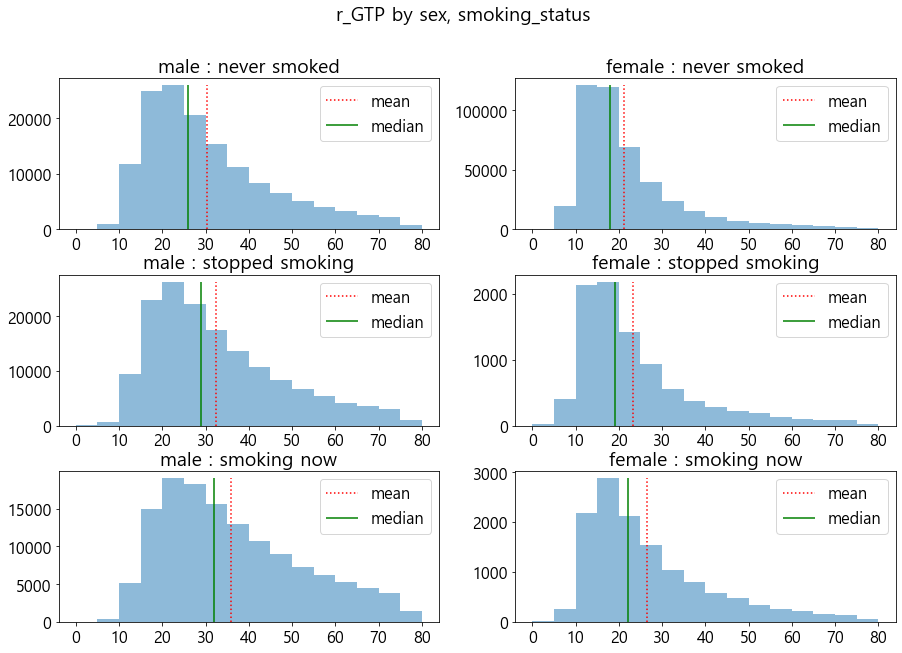

In [127]:
plt.rc('font', size=16)
fig = plt.figure(figsize=(15, 10))
fig.suptitle('r_GTP by sex, smoking_status')
fig.subplots_adjust(hspace=0.3)

i = 0
for smoke in [1.0, 2.0, 3.0]:
    for sex in [1, 2]:
        i += 1
        ax = fig.add_subplot(3, 2, i)
#         hist_, _, _ = ax.hist(r_GTPs[(sex, smoke)], range=(0, 80), bins=16, alpha=0.3, density=True)
        y, x = np.histogram(r_GTPs[(sex, smoke)], range=(0, 80), bins=16)
        x, y
        ax.bar(x[:-1]+2.5, y, width=5, alpha=0.5)
#         ax.plot(x[:-1]+2.5, y)
        ax.vlines(np.mean(r_GTPs[(sex, smoke)]), 0, y.max(), color='red', label='mean', ls=':')
        ax.vlines(np.median(r_GTPs[(sex, smoke)]), 0, y.max(), color='green', label='median')
        ax.set_xticks(range(0, 90, 10))
        ax.set_title(f'{li_sex[sex]} : {li_smoke[smoke]}')
        ax.legend()
plt.savefig('./data/r_GTP_distribution.png')
plt.show()

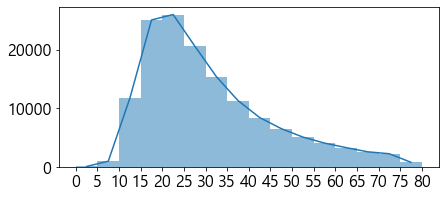

In [71]:
plt.rc('font', size=16)
fig = plt.figure(figsize=(15, 10))
# fig.suptitle('r_GTP by sex, smoking_status')
# fig.subplots_adjust(hspace=0.3)

i = 0
# for smoke in [1.0, 2.0, 3.0]:
#     for sex in [1, 2]:
sex, smoke = 1, 1.0
i += 1
ax = fig.add_subplot(3, 2, i)
y, x = np.histogram(r_GTPs[(sex, smoke)], range=(0, 80), bins=16)
x, y
ax.bar(x[:-1]+2.5, y, width=5, alpha=0.5)
ax.plot(x[:-1]+2.5, y)
ax.set_xticks(range(0, 81, 5))

plt.show()

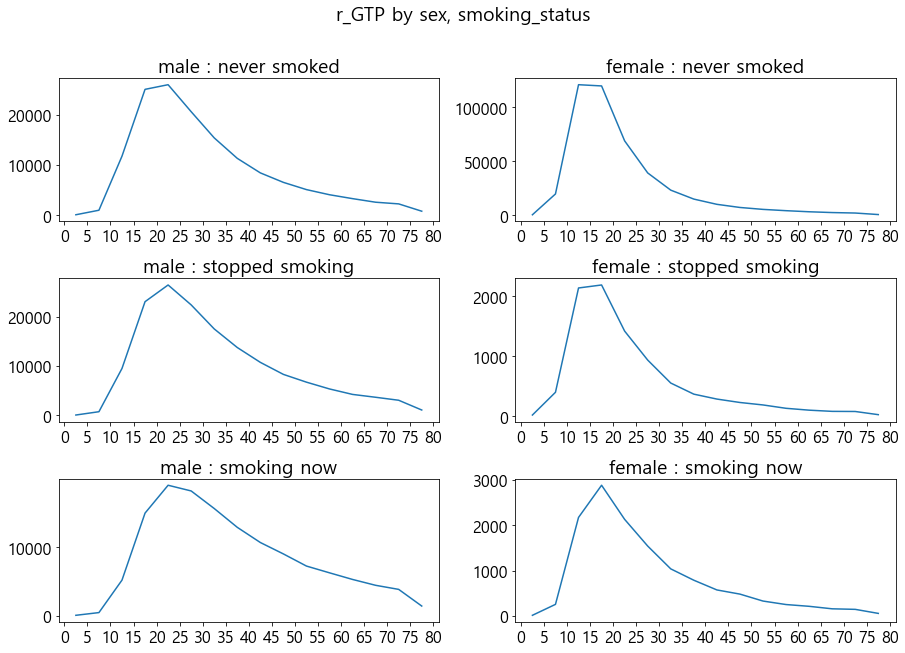

In [77]:
plt.rc('font', size=16)
fig = plt.figure(figsize=(15, 10))
fig.suptitle('r_GTP by sex, smoking_status')
fig.subplots_adjust(hspace=0.4)

i = 0
for smoke in [1.0, 2.0, 3.0]:
    for sex in [1, 2]:
        i += 1
        ax = fig.add_subplot(3, 2, i)
        y, x = np.histogram(r_GTPs[(sex, smoke)], range=(0, 80), bins=16)
        ax.plot(x[:-1]+2.5, y)
        ax.set_xticks(range(0, 85, 5))
        ax.set_title(f'{li_sex[sex]} : {li_smoke[smoke]}')

plt.show()

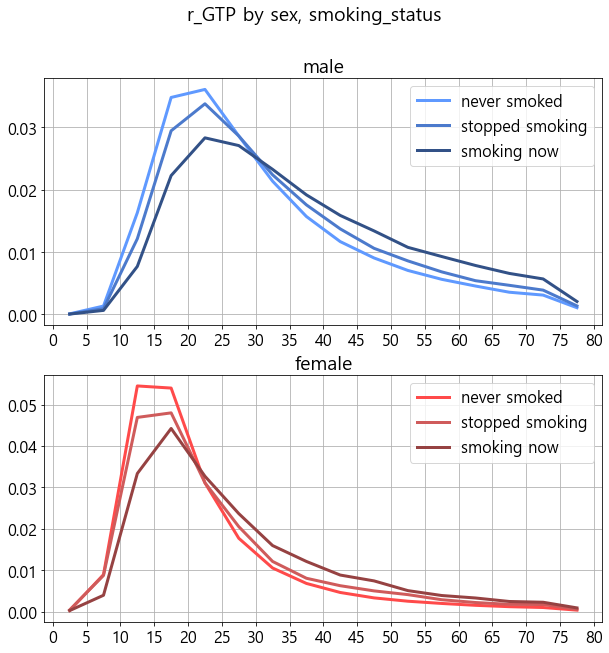

In [129]:
li_color = [['#5F99FF', '#4C7ACC', '#325187'], ['#FF4A4A', '#CF5B5B', '#964242']]

plt.rc('font', size=16)
fig = plt.figure(figsize=(10, 10))
fig.suptitle('r_GTP by sex, smoking_status')

for sex in [1, 2]:
    ax = fig.add_subplot(2, 1, sex)
    for smoke in [1.0, 2.0, 3.0]:
        y, x = np.histogram(r_GTPs[(sex, smoke)], range=(0, 80), bins=16, density=True)
        ax.plot(x[:-1]+2.5, y, label=f'{li_smoke[smoke]}', color=li_color[sex-1][int(smoke-1)], lw=3)
        ax.set_xticks(range(0, 85, 5))
    ax.legend()
    ax.set_title(f'{li_sex[sex]}')
    ax.grid()
plt.savefig('./data/r_GTP_by_sex.png')
plt.show()

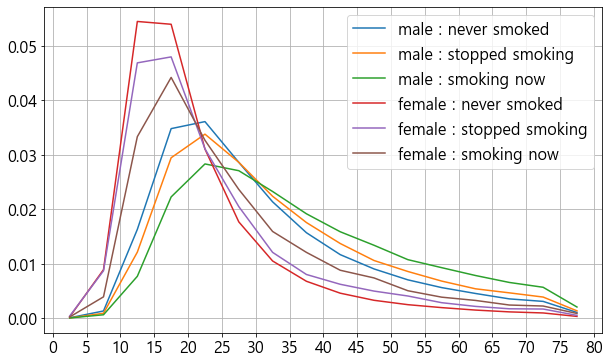

In [137]:
# li_color = [['#5F99FF', '#4C7ACC', '#325187'], ['#FF4A4A', '#CF5B5B', '#964242']]

plt.rc('font', size=16)
fig = plt.figure(figsize=(10, 6))
# fig.suptitle('r_GTP by sex, smoking_status')
ax = fig.add_subplot(1, 1, 1)

for sex in [1, 2]:    
    for smoke in [1.0, 2.0, 3.0]:
        y, x = np.histogram(r_GTPs[(sex, smoke)], range=(0, 80), bins=16, density=True)
        ax.plot(x[:-1]+2.5, y, label=f'{li_sex[sex]} : {li_smoke[smoke]}')
        ax.set_xticks(range(0, 85, 5))
    ax.legend()
#     ax.set_title(f'{li_sex[sex]}')
ax.grid()
plt.savefig('./data/bad_vis.png')
plt.show()

In [142]:
data6.columns

Index(['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압',
       '이완기 혈압', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피',
       '흡연상태'],
      dtype='object')

In [143]:
data6.iloc[:, [0, 12, 13]]

,성별코드,감마 지티피,흡연상태
0,1,21.0,1.0
1,2,15.0,1.0
2,2,7.0,1.0
3,1,72.0,1.0
4,2,14.0,1.0
...,...,...,...
999995,2,18.0,1.0
999996,2,19.0,1.0
999997,1,17.0,1.0
999998,2,13.0,1.0


# 기타

## 상관계수 히트맵

In [46]:
import seaborn as sns

In [47]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

In [118]:
crr = data5.astype(float).corr()
crr

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태
성별코드,1.000000,0.063450,-0.721522,-0.555161,-0.407176,-0.116100,-0.176758,-0.618968,-0.043891,-0.347889,-0.066026,-0.167875,-0.235982,-0.597070
연령대 코드(5세단위),0.063450,1.000000,-0.360155,-0.231608,0.096925,0.229797,-0.030645,-0.158074,0.024218,0.047783,0.030124,-0.060097,-0.057580,-0.162111
신장(5Cm단위),-0.721522,-0.360155,1.000000,0.662027,0.331398,0.004586,0.133679,0.491409,0.024550,0.244013,0.027365,0.131248,0.165758,0.476871
체중(5Kg 단위),-0.555161,-0.231608,0.662027,1.000000,0.786261,0.191913,0.257188,0.459899,0.049381,0.211227,0.073772,0.237864,0.194619,0.356109
허리둘레,-0.407176,0.096925,0.331398,0.786261,1.000000,0.275727,0.242452,0.344171,0.066259,0.177399,0.091183,0.222484,0.191994,0.244006
수축기 혈압,-0.116100,0.229797,0.004586,0.191913,0.275727,1.000000,0.700226,0.121890,0.061506,0.058025,0.049651,0.073246,0.111420,0.036947
이완기 혈압,-0.176758,-0.030645,0.133679,0.257188,0.242452,0.700226,1.000000,0.249693,0.043894,0.055799,0.052651,0.103634,0.141122,0.111021
혈색소,-0.618968,-0.158074,0.491409,0.459899,0.344171,0.121890,0.249693,1.000000,0.025936,0.166308,0.088201,0.217725,0.206322,0.431010
요단백,-0.043891,0.024218,0.024550,0.049381,0.066259,0.061506,0.043894,0.025936,1.000000,0.148631,0.037657,0.040305,0.059256,0.034152
혈청크레아티닌,-0.347889,0.047783,0.244013,0.211227,0.177399,0.058025,0.055799,0.166308,0.148631,1.000000,0.024309,0.055069,0.069410,0.183488


In [123]:
crr = crr.applymap(lambda x: np.abs(x).round(1))

<AxesSubplot:>

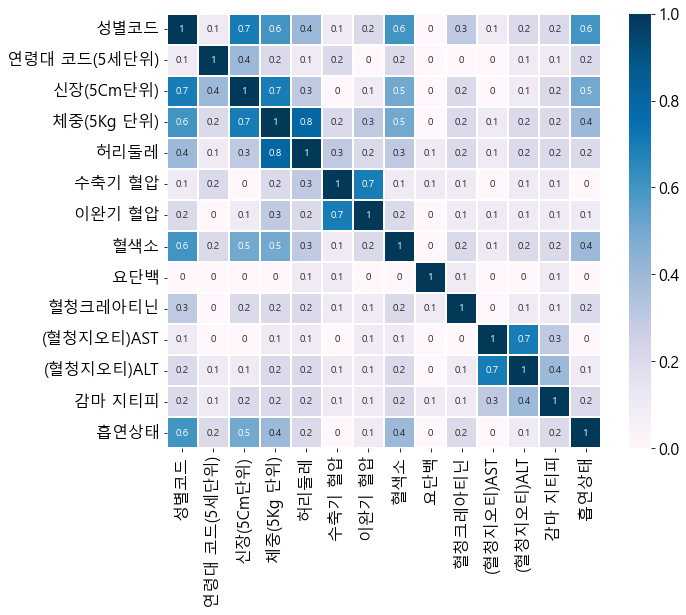

In [124]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(crr, linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})